In [1]:
# Import necessary libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
# Load dataset
df=pd.read_csv('NSE-Tata-Global-Beverages-Limited.csv')
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


### Basic checks

In [3]:
# First five rows
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [4]:
# Last five rows
df.tail

<bound method NDFrame.tail of             Date    Open    High     Low    Last   Close  \
0     2018-10-08  208.00  222.25  206.85  216.00  215.15   
1     2018-10-05  217.00  218.60  205.90  210.25  209.20   
2     2018-10-04  223.50  227.80  216.15  217.25  218.20   
3     2018-10-03  230.00  237.50  225.75  226.45  227.60   
4     2018-10-01  234.55  234.60  221.05  230.30  230.90   
...          ...     ...     ...     ...     ...     ...   
1230  2013-10-14  160.85  161.45  157.70  159.30  159.45   
1231  2013-10-11  161.15  163.45  159.00  159.80  160.05   
1232  2013-10-10  156.00  160.80  155.85  160.30  160.15   
1233  2013-10-09  155.70  158.20  154.15  155.30  155.55   
1234  2013-10-08  157.00  157.80  155.20  155.80  155.80   

      Total Trade Quantity  Turnover (Lacs)  
0                4642146.0         10062.83  
1                3519515.0          7407.06  
2                1728786.0          3815.79  
3                1708590.0          3960.27  
4                15

In [5]:
# shape of dataset
df.shape

(1235, 8)

* In datset 6 features & 1235 observations present.

In [6]:
# columns in dataset
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [7]:
# statistics of data
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [8]:
# Information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [9]:
# Missing values in data
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

* No missing values in data.

In [10]:
df['Date'].value_counts()

2018-10-08    1
2015-06-15    1
2015-06-04    1
2015-06-05    1
2015-06-08    1
             ..
2017-02-09    1
2017-02-10    1
2017-02-13    1
2017-02-14    1
2013-10-08    1
Name: Date, Length: 1235, dtype: int64

<AxesSubplot:>

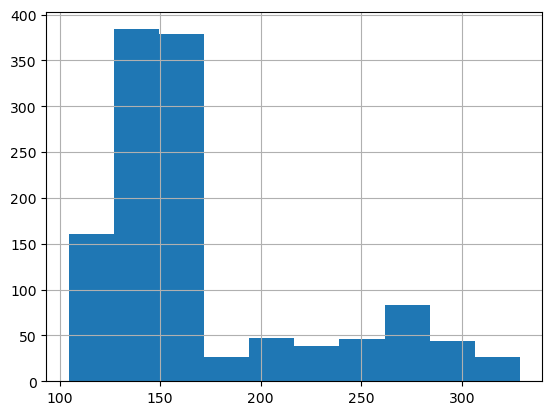

In [11]:
df['High'].hist()

<AxesSubplot:>

<Figure size 2000x800 with 0 Axes>

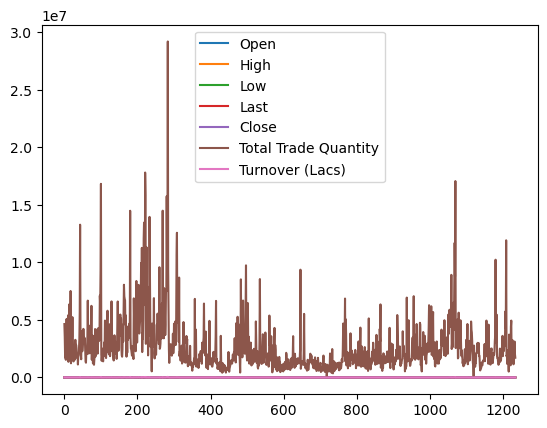

In [12]:
plt.figure(figsize=(20,8))
df.plot()

In [13]:
data=df.filter(['close'])
dataset=df.values
training_data_len=math.ceil(len(df)*8)
training_data_len

9880

In [14]:
dataset

array([['2018-10-08', 208.0, 222.25, ..., 215.15, 4642146.0, 10062.83],
       ['2018-10-05', 217.0, 218.6, ..., 209.2, 3519515.0, 7407.06],
       ['2018-10-04', 223.5, 227.8, ..., 218.2, 1728786.0, 3815.79],
       ...,
       ['2013-10-10', 156.0, 160.8, ..., 160.15, 3124853.0, 4978.8],
       ['2013-10-09', 155.7, 158.2, ..., 155.55, 2049580.0, 3204.49],
       ['2013-10-08', 157.0, 157.8, ..., 155.8, 1720413.0, 2688.94]],
      dtype=object)

In [15]:
df=df.iloc[:,0:5]
df

,Date,Open,High,Low,Last
0,2018-10-08,208.00,222.25,206.85,216.00
1,2018-10-05,217.00,218.60,205.90,210.25
2,2018-10-04,223.50,227.80,216.15,217.25
3,2018-10-03,230.00,237.50,225.75,226.45
4,2018-10-01,234.55,234.60,221.05,230.30
...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30
1231,2013-10-11,161.15,163.45,159.00,159.80
1232,2013-10-10,156.00,160.80,155.85,160.30
1233,2013-10-09,155.70,158.20,154.15,155.30


In [16]:
training_set=df.iloc[:,1:2].values
training_set

array([[208. ],
       [217. ],
       [223.5],
       ...,
       [156. ],
       [155.7],
       [157. ]])

#### Scaling the Dataset

In [17]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(0,1))
data_training_scaled=scalar.fit_transform(training_set)

In [18]:
feature_set=[]
labels=[]
for i in range (60,586):
  feature_set.append(data_training_scaled[i-60:i,0])
  labels.append(data_training_scaled[i,0])

In [19]:
features_set,labels=np.array(feature_set),np.array(labels)

In [20]:
features_set=np.reshape(features_set,(features_set.shape[0],features_set.shape[1],1))
features_set.shape

(526, 60, 1)

#### Building The LSTM

In [21]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [22]:
model=Sequential()

In [23]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [24]:
model.fit(features_set,labels,epochs=50,batch_size=20)

Epoch 1/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 2/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 3/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 4/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 5/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 6/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 7/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 8/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0144
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 11/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 12/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 13/50
27/27 [==============================

In [25]:
data_testing_complete=pd.read_csv('NSE-Tata-Global-Beverages-Limited.csv')
data_testing_processed=data_testing_complete.iloc[:,1:2]
data_testing_processed

,Open
0,208.00
1,217.00
2,223.50
3,230.00
4,234.55
...,...
1230,160.85
1231,161.15
1232,156.00
1233,155.70


#### Prediction of Data

In [26]:
data_total=pd.concat((df['Open'],df['Open']),axis=0)

In [27]:
test_inputs=data_total[len(data_total)-len(df)-60:].values
test_inputs.shape

(1295,)

In [28]:
test_inputs=test_inputs.reshape(-1,1)
test_inputs=scalar.transform(test_inputs)

In [29]:
test_features=[]
for i in range(60,89):
  test_features.append(test_inputs[i-60:i,0])

In [30]:
test_features=np.array(test_features)
test_features=np.reshape(test_features,(test_features.shape[0],test_features.shape[1],1))
test_features.shape

(29, 60, 1)

In [31]:
predictions=model.predict(test_features)

In [32]:
predictions

array([[[0.25589675],
        [0.2574544 ],
        [0.25144637],
        ...,
        [0.23587005],
        [0.23453493],
        [0.24032043]],

       [[0.2574544 ],
        [0.25144637],
        [0.24721852],
        ...,
        [0.23453493],
        [0.24032043],
        [0.46728972]],

       [[0.25144637],
        [0.24721852],
        [0.25723186],
        ...,
        [0.24032043],
        [0.46728972],
        [0.5073431 ]],

       ...,

       [[0.17356475],
        [0.17601246],
        [0.18402314],
        ...,
        [0.59635067],
        [0.58900756],
        [0.582332  ]],

       [[0.17601246],
        [0.18402314],
        [0.18736093],
        ...,
        [0.58900756],
        [0.582332  ],
        [0.59635067]],

       [[0.18402314],
        [0.18736093],
        [0.19247887],
        ...,
        [0.582332  ],
        [0.59635067],
        [0.57320875]]], dtype=float32)

In [33]:
x_train=df[0:1256]
y_train=df[1:1257]
print(x_train.shape)
print(y_train.shape)

(1235, 5)
(1234, 5)


In [34]:
x_train

,Date,Open,High,Low,Last
0,2018-10-08,208.00,222.25,206.85,216.00
1,2018-10-05,217.00,218.60,205.90,210.25
2,2018-10-04,223.50,227.80,216.15,217.25
3,2018-10-03,230.00,237.50,225.75,226.45
4,2018-10-01,234.55,234.60,221.05,230.30
...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30
1231,2013-10-11,161.15,163.45,159.00,159.80
1232,2013-10-10,156.00,160.80,155.85,160.30
1233,2013-10-09,155.70,158.20,154.15,155.30


In [35]:
np.random.seed(1)
np.random.randn(3,3)

array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ,  0.3190391 ]])

#### Draw single number from the normal distribution

In [36]:
np.random.normal(1)

0.7506296245225899

#### Draw 5 number from normal distribution

In [37]:
np.random.normal(5)

6.4621079370449745

In [38]:
np.random.seed(42)
np.random.normal(size=1000,scale=100).std()

97.87262077473541

#### Plotting Results

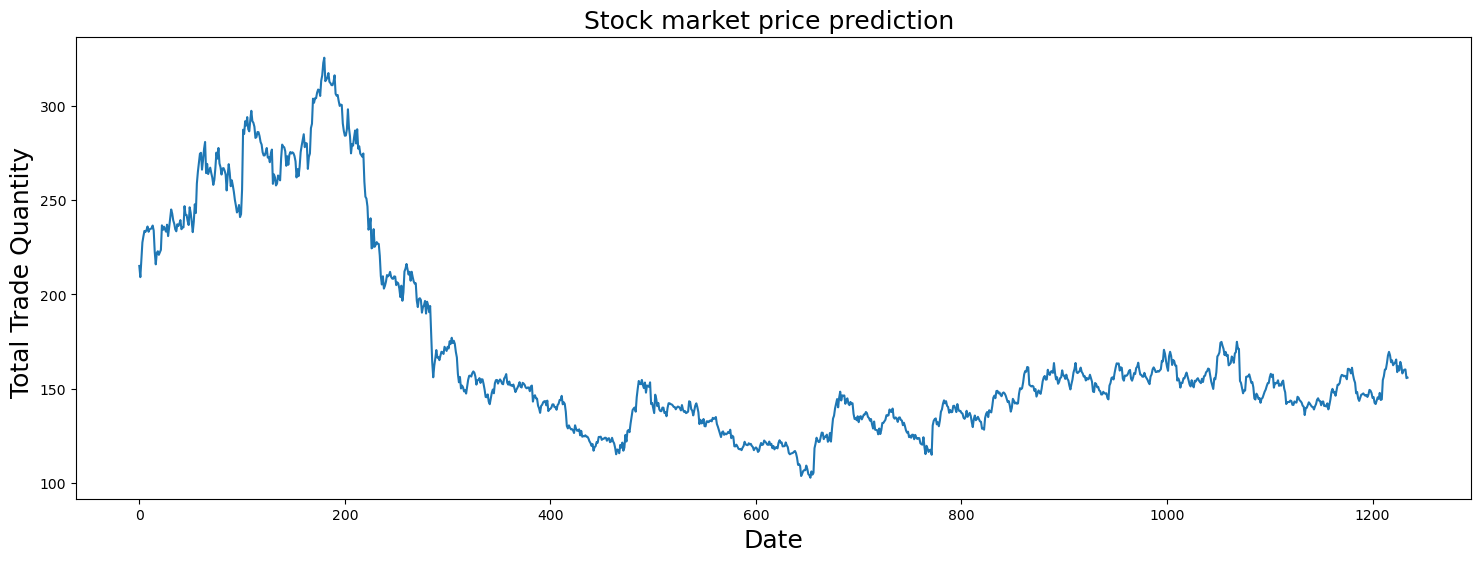

In [39]:
plt.figure(figsize=(18,6))
plt.title("Stock market price prediction ",fontsize=18)

plt.plot(data_testing_complete['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Total Trade Quantity ',fontsize=18)
plt.show()

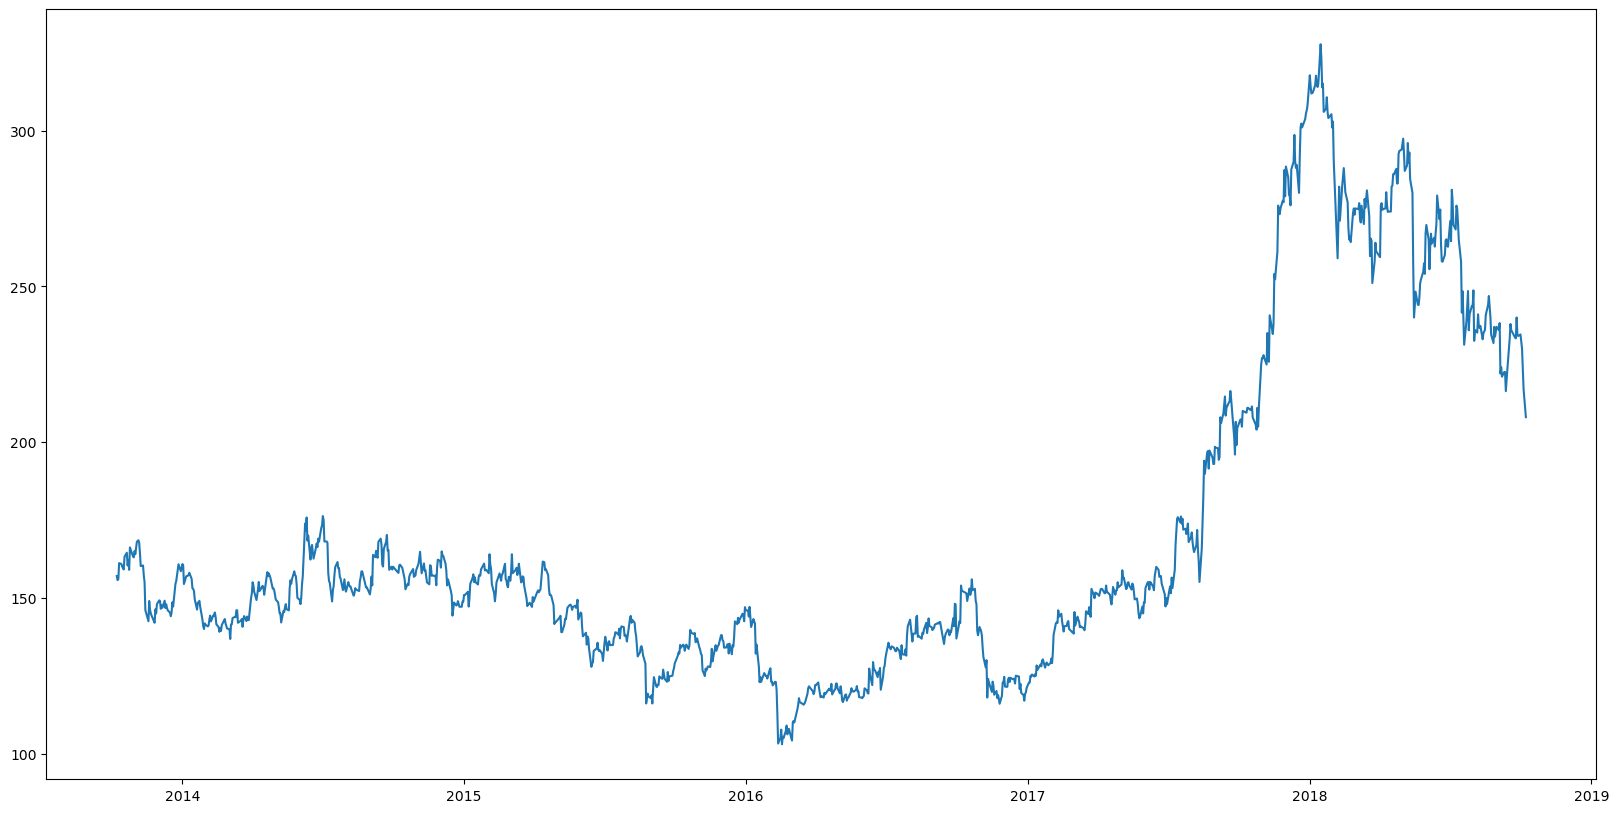

In [40]:
#Analysing closing prices from dataframe
df['Date']=pd.to_datetime(df.Date)
df.index=df['Date']

plt.figure(figsize=(20,10))
plt.plot(df['Open'],label='ClosePriceHist')

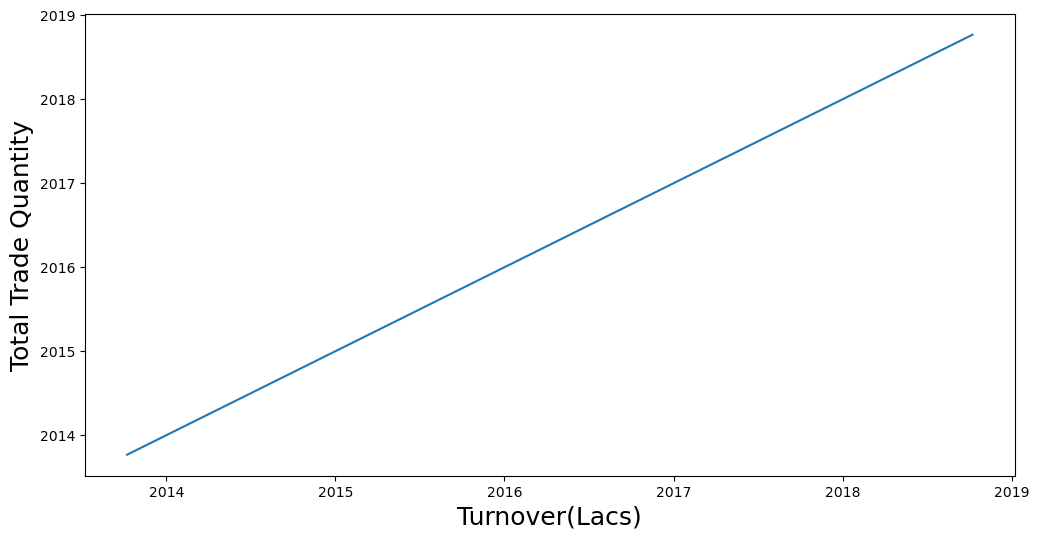

In [41]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'])
plt.xlabel('Turnover(Lacs)',fontsize=18)
plt.ylabel('Total Trade Quantity',fontsize=18)
plt.show()

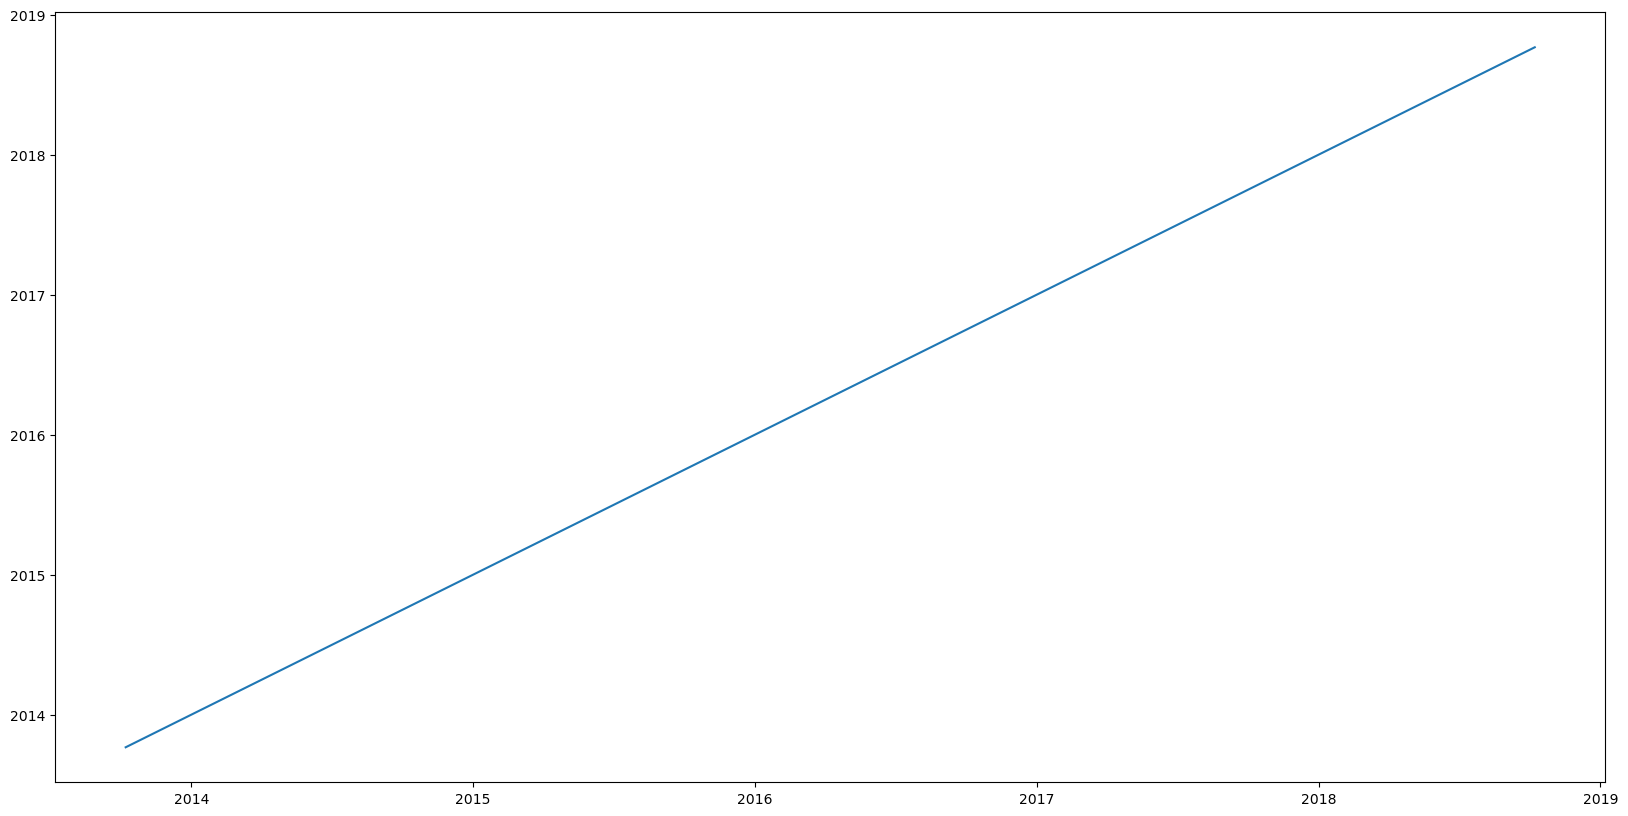

In [42]:
#Analyse the closing price from dataframe
df['Turnover(Lacs)']=pd.to_datetime(df.Date)
df.index=df['Turnover(Lacs)']

plt.figure(figsize=(20,10))
plt.plot(df['Turnover(Lacs)'],label='CloserPriceHist')